In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import imageio  
import random 
import time
from datetime import timedelta
from collections import defaultdict

In [2]:
def cluster_asn(pixel, centroids):
    
    cluster_number = np.linalg.norm(centroids - pixel, axis=1)
    return np.argmin(cluster_number)


def centroids_adjust(pixel, assign_cluster, centroids):
 
    x, y = pixel.shape[:2]
    
    centroids_new = defaultdict(list)

    for i in range(x):
        for j in range(y):
            pixel[i, j]
            cluster = assign_cluster[i, j]
            centroids_new[cluster].append(pixel[i, j])

    centroids_fin = []

    for cluster in range(len(centroids)):
        cluster_pixels = centroids_new[cluster]
        
        if cluster_pixels:
            centroid_mean = np.mean(cluster_pixels, axis=0)
            centroid_rounded = np.around(centroid_mean).astype(np.uint8)
            centroids_fin.append(centroid_rounded.tolist())
        else:
            centroids_fin.append(centroids[cluster])
    
    return centroids_fin

def kmeans(pixel, k):
    
    time_start = time.time()
    
    x, y, z = pixel.shape
    
    assign_cluster = np.empty(shape=(x, y), dtype='object')

    np.random.seed(101)
    
    centroids = np.random.randint(0, 255, size=(k, 3)).tolist()

    iter_count = 1


    for i in range(x):
        for j in range(y):
            pixl = pixel[i, j]
            assign_cluster[i, j] = cluster_asn(pixl, centroids)
        

    centroids_new = centroids_adjust(pixel, assign_cluster, centroids)
    
    while centroids != centroids_new:
        iter_count += 1
        
        centroids = centroids_new

        for i in range(x):
            for j in range(y):
                pixl = pixel[i, j]
                assign_cluster[i, j] = cluster_asn(pixl, centroids)
 
        centroids_new = centroids_adjust(pixel, assign_cluster, centroids)
        

    time_end = time.time()  
    total_time = timedelta(seconds=time_end - time_start).seconds
    
   
    image = np.empty(shape=(x, y, z), dtype='object')
    for row in range(x):
        for col in range(y):
            pixl = assign_cluster[row, col]
            image[row, col] = np.array(centroids_new[pixl])
    

    labels = assign_cluster + 1
    image_final = np.reshape(image, (pixel.shape))
    
    
    wcss = 0  

    for row in range(x):
        for col in range(y):
            cluster = assign_cluster[row, col]
            image_final[row, col] = np.array(centroids_new[cluster])
            wcss += np.linalg.norm(pixel[row, col] - centroids_new[cluster])**2
    
    return labels, centroids_new, image_final, iter_count, total_time, wcss



In [3]:

'''

k_values = [2,4]
image_paths = ['coastal-abstract.jpeg', 'flowers.bmp']

for k in k_values:
    for img in image_paths:
        
        image = imageio.imread(img)
        
        label, cluster_centers, compressed_image, iterations, run_time, wcss = kmeans(image, k)
    
        img_name = img.split('/')[-1].split('.')[0]
        output_path = f'kmeans_output/{img_name}_{k}.png'

        plt.imsave(output_path, compressed_image.astype(np.uint8))
        print(f'{img_name}, k = {k}, Iterations = {iterations}, Time = {run_time} seconds, wcss = {wcss}',)


wcss_dict = {img: [] for img in image_paths}
        
for img in image_paths:
    img_name = img.split('/')[-1].split('.')[0]
    ks, wcss_values = zip(*wcss_dict[img])
    
    plt.figure()
    plt.plot(ks, wcss_values, marker='o')
    plt.title(f'WCSS vs. k for {img_name}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    
    plt.savefig(f'kmeans_output/{img_name}_wcss_plot.png')
    plt.show()
    
    
'''

"\n\nk_values = [2,4]\nimage_paths = ['coastal-abstract.jpeg', 'flowers.bmp']\n\nfor k in k_values:\n    for img in image_paths:\n        \n        image = imageio.imread(img)\n        \n        label, cluster_centers, compressed_image, iterations, run_time, wcss = kmeans(image, k)\n    \n        img_name = img.split('/')[-1].split('.')[0]\n        output_path = f'kmeans_output/{img_name}_{k}.png'\n\n        plt.imsave(output_path, compressed_image.astype(np.uint8))\n        print(f'{img_name}, k = {k}, Iterations = {iterations}, Time = {run_time} seconds, wcss = {wcss}',)\n\n\nwcss_dict = {img: [] for img in image_paths}\n        \nfor img in image_paths:\n    img_name = img.split('/')[-1].split('.')[0]\n    ks, wcss_values = zip(*wcss_dict[img])\n    \n    plt.figure()\n    plt.plot(ks, wcss_values, marker='o')\n    plt.title(f'WCSS vs. k for {img_name}')\n    plt.xlabel('Number of clusters (k)')\n    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')\n    plt.grid(True)\n    \n    p

coastal-abstract, k = 2, Iterations = 9, Time = 31 seconds


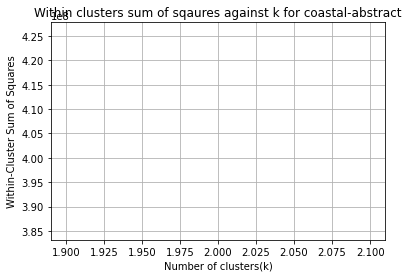

In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os

k_values = [2]
image_paths = ['coastal-abstract.jpeg']


wcss_dict = {img: [] for img in image_paths}

output_dir = 'kmeans_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for k in k_values:
    for img in image_paths:
        image = imageio.imread(img)
        
        
        label, cluster_centers, compressed_image, iterations, run_time, wcss = kmeans(image, k)
        
        wcss_dict[img].append((k, wcss))
    
        img_name = img.split('/')[-1].split('.')[0]
        output_path = f'kmeans_output/{img_name}_{k}.png'
        
        plt.imsave(output_path, compressed_image.astype(np.uint8))
        print(f'{img_name}, k = {k}, Iterations = {iterations}, Time = {run_time} seconds')
        

for img in image_paths:
    img_name = img.split('/')[-1].split('.')[0]
    k_values, wcss_values = zip(*wcss_dict[img])
    
    plt.figure()
    plt.plot(k_values, wcss_values)
    plt.title(f'Within clusters sum of sqaures against k for {img_name}')
    plt.xlabel('Number of clusters(k)')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.grid(True)
    
    plt.savefig(f'kmeans_output/{img_name}_wcss_plot.png')
    plt.show()


In [5]:
One of the methods used to calculate optimal value of k is the elbow method.
In the elbow method we first run the k means algorithm for a range of values for k and then we calculate the within cluster sum of squares for each of the value.
After calculating the wcss, we plot the values of wcss against the values of k and examine the graph, as the values of k increase, the values of Wcss keep on decreasing. But there is a point at which the change in value is not really significant and it forms the shape of an elbow. The point of elbow is selected as the optimal value for k.

In the pictures we used in this code, the value of wcss stops decreasing significantly after k value of 16, which makes 16 the optimal value of k.

SyntaxError: invalid syntax (<ipython-input-5-4152ac689eb2>, line 1)